In [1]:
%%markdown
## Assignment4
### -- Yuanjie Yue

## Assignment4
### -- Yuanjie Yue


In [2]:
# preparation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%markdown
# 1. Clustering the Iris Dataset

# 1. Clustering the Iris Dataset


In [4]:
import pandas as pd 
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/" 
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"] 
df = pd.read_csv(url + "iris.data", header=None, names=names)

In [5]:
df.groupby('Name').size()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
%%markdown
## 1.1 Clustering Data with k-Means

## 1.1 Clustering Data with k-Means


In [7]:
# 1) Plot a scatter plot matrix between all features (see pandas.plotting.scatter matrix). 
#    Use the “Name” column to color the points. 
#    Note that you may have to convert the “Name” column into integers to use it 
#    for specifying the plot colors (see the ‘c’ parameter). 
#    Resize the plot as needed. Do the three classes appear to be equally well-separated 
#    or is one more diﬀerent than the others?

In [8]:
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [9]:
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df['Name'] = y
df.groupby('Name').size()

Name
0    50
1    50
2    50
dtype: int64

In [14]:
from matplotlib import pyplot as plt
from pandas import plotting

In [15]:
cols = df.columns
cols

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], dtype='object')

In [16]:
plt.rcParams["figure.dpi"] = 300

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2315ebe0>,
      dtype=object)

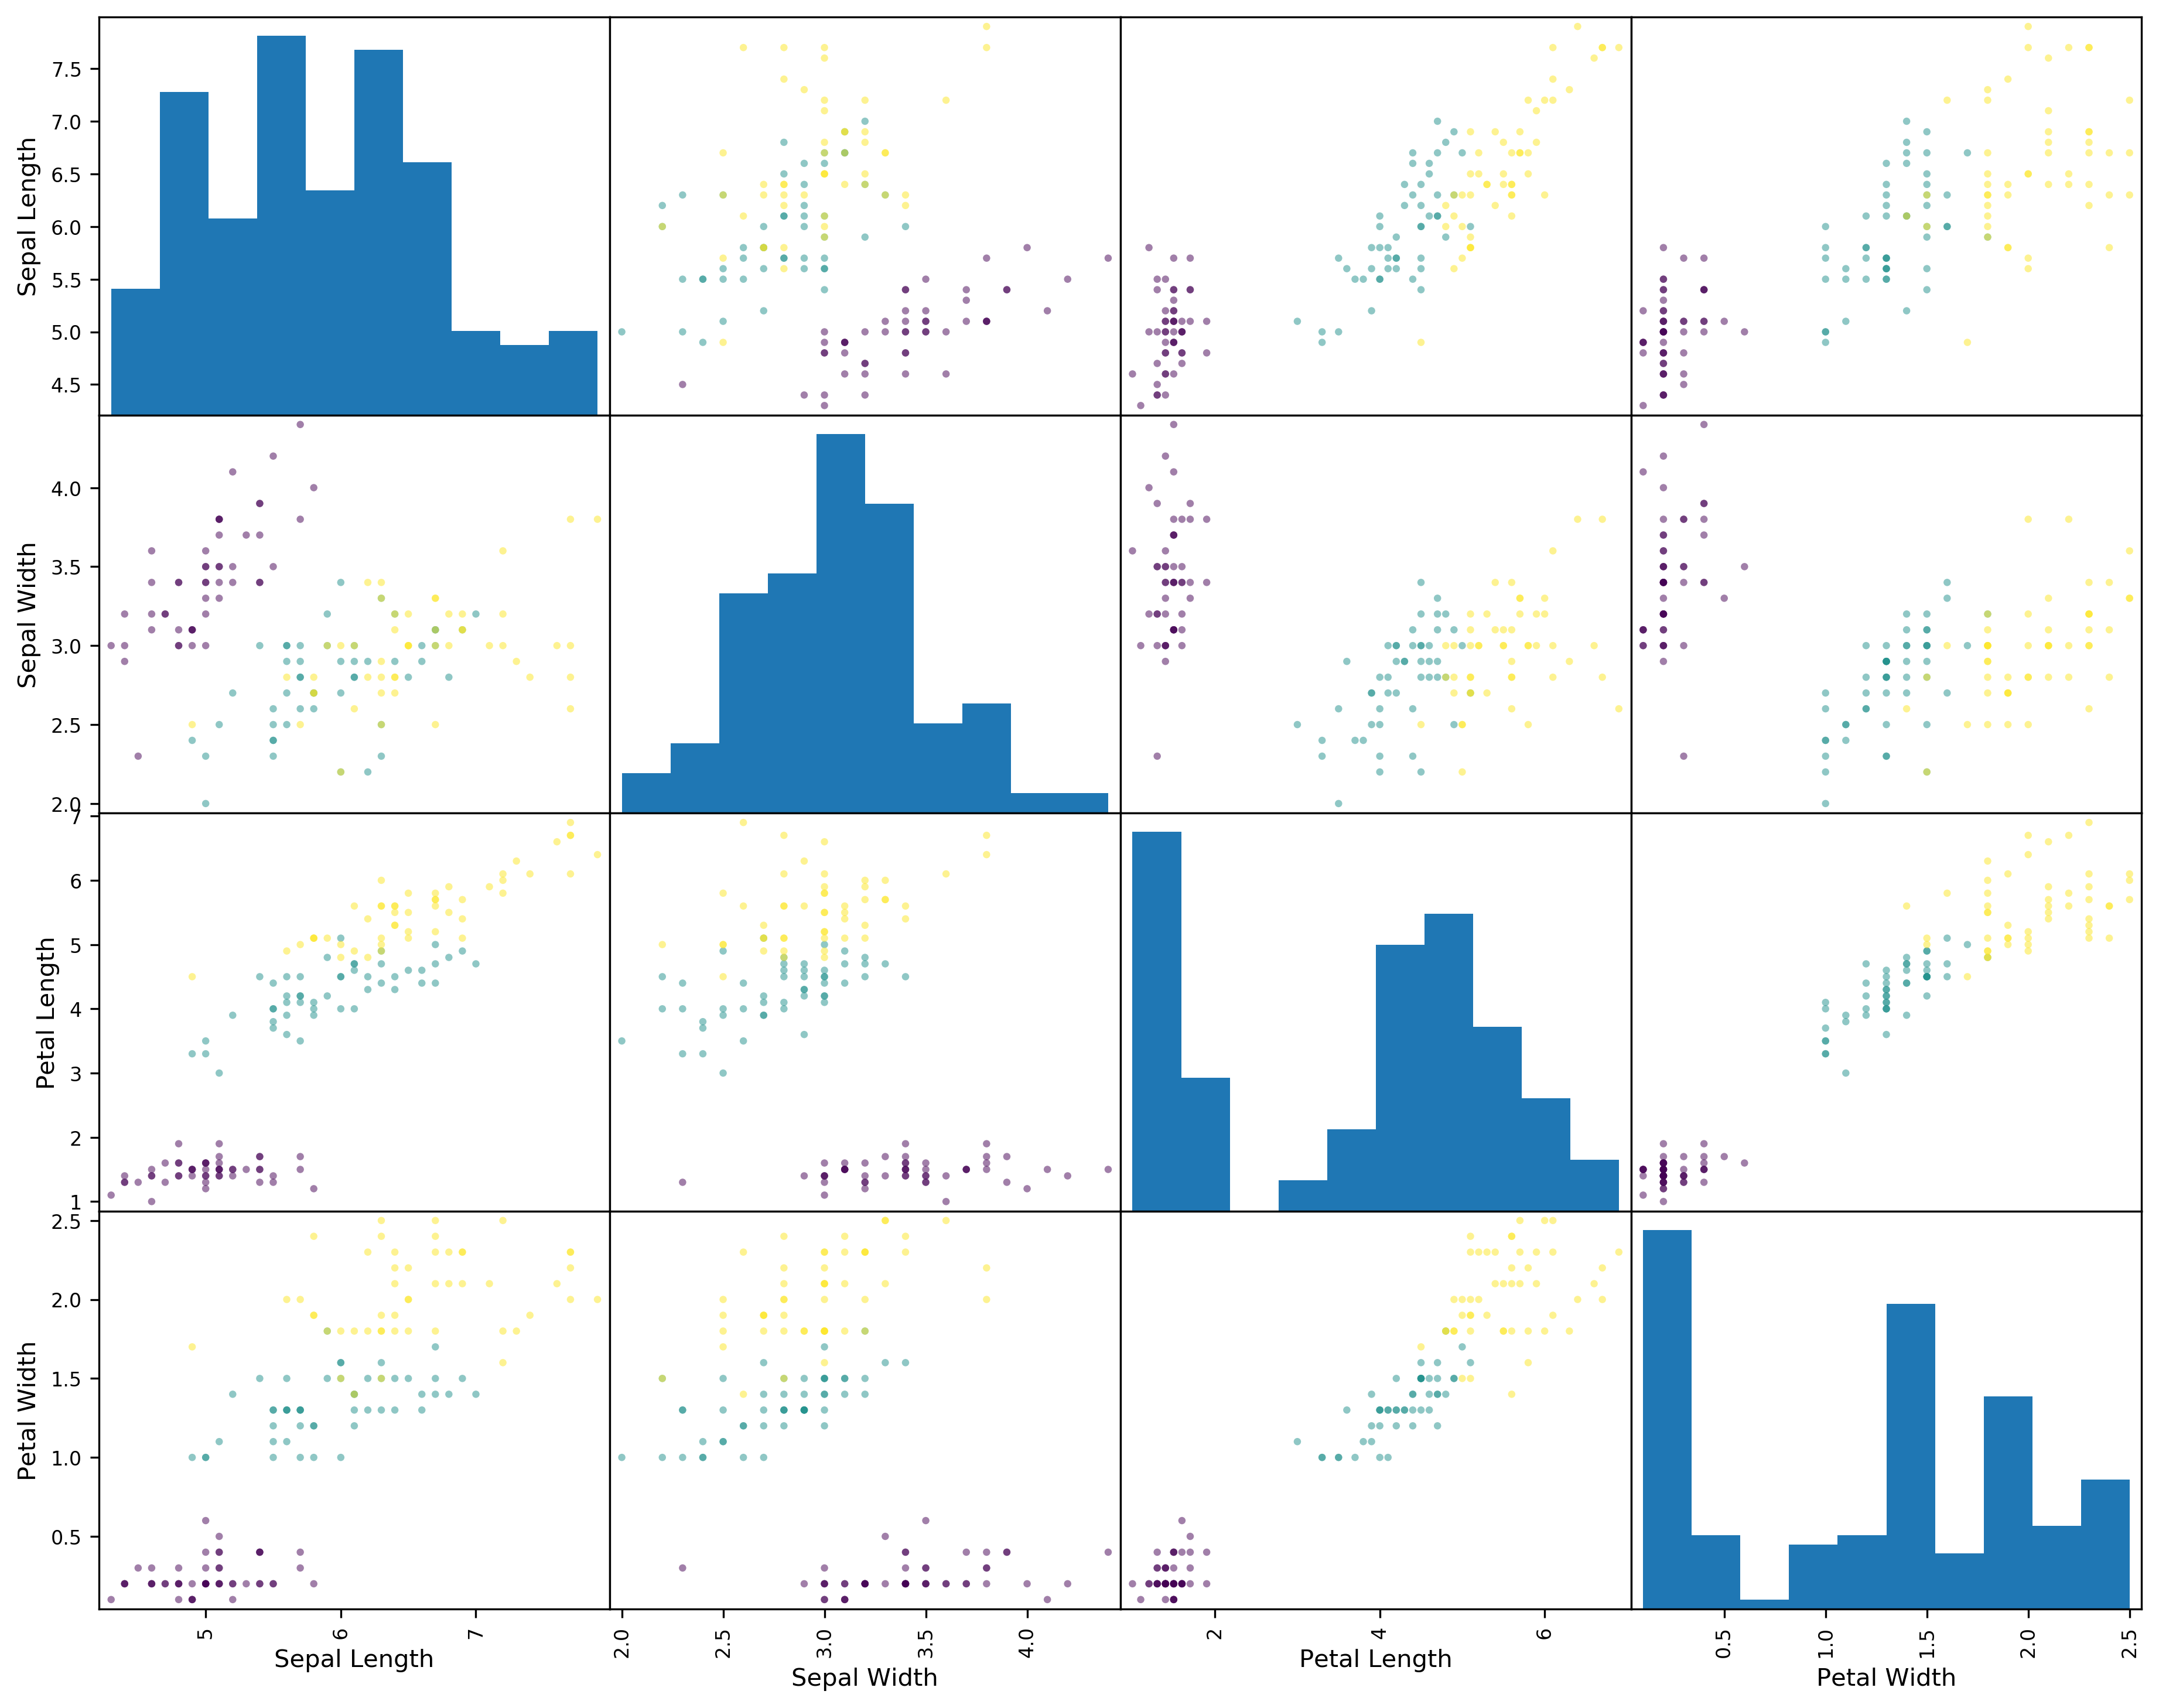

In [17]:
plotting.scatter_matrix(X, figsize=(15,12), c=y, cmap='viridis')

In [18]:
# Do the three classes appear to be equally well-separated or is one more diﬀerent than the others?

In [19]:
%%markdown
No, from the scatters above, we can tell that Setosa represented by purple dots are well seperated with 
the other two colored (yellow, red) dots, for which, we could easily draw a line between them, so Setosa is
well seperated. However, some Versicolor and Virginia that represents by yellow and red dots, are overlapping with 
each other.

No, from the scatters above, we can tell that Setosa represented by purple dots are well seperated with 
the other two colored (yellow, red) dots, for which, we could easily draw a line between them, so Setosa is
well seperated. However, some Versicolor and Virginia that represents by yellow and red dots, are overlapping with 
each other.


In [20]:
# 2) Cluster the the data using k-Means clustering (see sklearn.cluster.KMeans). 
#    Form 3 clusters (n clusters=3), with the four features as the input data, 
#    and plot the resulting clusters as a 2D scatter plot. 
#    Use “Petal Length” for the x-axis of the plot and “Petal Width” for the y-axis, 
#    with each point colored according to its assigned cluster label.

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [23]:
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Text(0.5, 1.0, 'Clusters, k=3')

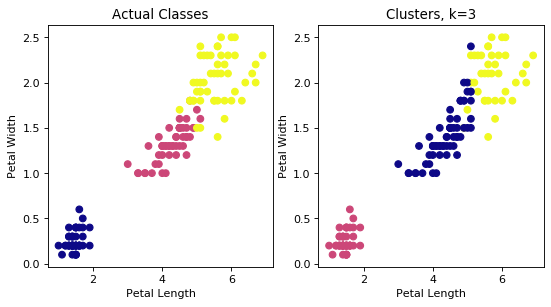

In [24]:
plt.figure(figsize=(8, 4), dpi=80)
plt.subplot(121)
plt.scatter(x=X['Petal Length'], y=X['Petal Width'], c=y, cmap='plasma')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Actual Classes')
plt.subplot(122)
plt.scatter(x=X['Petal Length'], y=X['Petal Width'], c=y_pred, cmap='plasma')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusters, k=3')

In [25]:
# 3) Show the cross-tabulation (see pandas.crosstab) of the actual class values and the cluster labels. 
#    How many instances belong to an incorrect cluster? Do any of the cluster labels correspond perfectly
#    to a class label? Do these observations agree with what you observed from the scatter plot matrix?

In [26]:
pd.crosstab(y, y_pred)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [27]:
%%markdown
1. There are 114 (50 + 48 + 2 + 14) instances belong to an incorrect cluster. 
2. No, there is no cluster labels correspond perfectly to a class label. 
However, those 0 labels in the actual class are perfectly fit with the 1 labels in the cluster predict class.
And those 1 labels in the actual class are amlost (with 48 out of 50 fitting) fit with the 0 labels in the cluster predict class,

1. There are 114 (50 + 48 + 2 + 14) instances belong to an incorrect cluster. 
2. No, there is no cluster labels correspond perfectly to a class label. 
However, those 0 labels in the actual class are perfectly fit with the 1 labels in the cluster predict class.
And those 1 labels in the actual class are amlost (with 48 out of 50 fitting) fit with the 0 labels in the cluster predict class,


In [28]:
%%markdown
## 1.2 Hierarchical Clustering of Features

## 1.2 Hierarchical Clustering of Features


In [29]:
# 1）To assess how similar the features are, calculate the mutual information between all pairs of features 
#   (see sklearn.feature selection.mutual info regression); that is, use each feature as the target variable
#   once in the calculation. Create a DataFrame from the output and label the indices and columns of the DataFrame
#   with the appropriate feature names.

In [30]:
from sklearn.feature_selection import mutual_info_regression

In [31]:
sepal_length = mutual_info_regression(X, df['Sepal Length'])
sepal_width = mutual_info_regression(X, df['Sepal Width'])
petal_length = mutual_info_regression(X, df['Petal Length'])
petal_width = mutual_info_regression(X, df['Petal Width'])

In [32]:
df_mutual_infomation = pd.DataFrame(pd.np.row_stack([sepal_length, sepal_width, petal_length, petal_width]), 
             index=['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width'],
            columns= ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width'])
df_mutual_infomation

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.193199,0.299563,0.856638,0.614537
Sepal Width,0.252983,2.687494,0.354057,0.415616
Petal Length,0.876869,0.366794,3.124791,1.250483
Petal Width,0.621587,0.393692,1.194836,2.704058


In [33]:
# 2) Create a dendrogram from the mutual information DataFrame. According to the dendrogram, which pair of features
#    is most similar? Which feature is most unlike the others? You may use the following function to generate the
#    dendrogram, which takes as input the ﬁt cluster model; you can pass the feature names with the labels parameter. 

In [34]:
import numpy as np 
from scipy.cluster.hierarchy import dendrogram 
def plot_dendrogram(model, ** kwargs):
    children = model.children_ 
    dist = np.arange(children.shape[0])+1 
    n_obs = np.arange(2, children.shape[0]+2) 
    linkage_matrix = np.column_stack([children, dist, n_obs]) 
    dendrogram(linkage_matrix.astype(float), ** kwargs)

In [35]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(df_mutual_infomation)

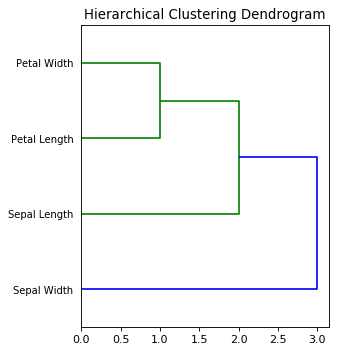

In [36]:
figure = plt.figure(figsize=(4,5), dpi=80)
labels = df_mutual_infomation.columns.values
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=labels, orientation='right', leaf_font_size=9)
plt.show()

In [37]:
%%markdown
1. The pair of features, 'Petal Width' and 'Petal Length' are the most similar.
2. The Sepal Width feature is most unlike the others.

1. The pair of features, 'Petal Width' and 'Petal Length' are the most similar.
2. The Sepal Width feature is most unlike the others.
